# Machine Learning for rr_intervals

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rr_interval = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\RRdata1\0003.vt1')

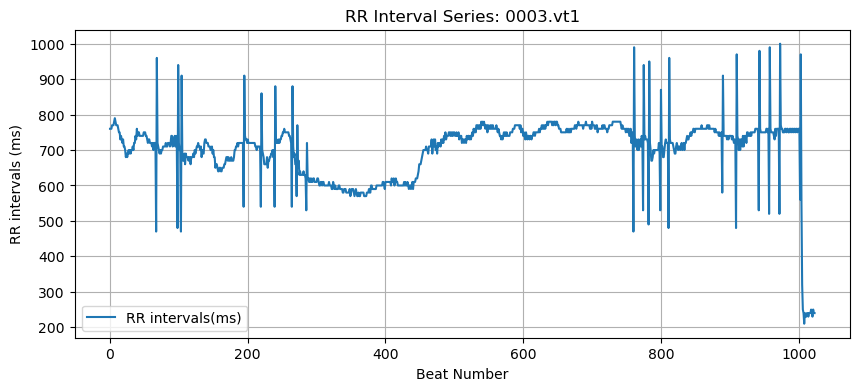

In [6]:
plt.figure(figsize=(10 , 4))
plt.plot(rr_interval, label="RR intervals(ms)")
plt.xlabel("Beat Number")
plt.ylabel("RR intervals (ms)")
plt.title("RR Interval Series: 0003.vt1")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np
rr_event = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\RRdata1\0003.vt1')
rr_baseline = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\mr\0003.mr1')
print("Event RR intervals:", rr_event[:10])
print("Baseline RR intervals:", rr_baseline[:10])

Event RR intervals: [760. 760. 760. 770. 770. 770. 780. 790. 780. 770.]
Baseline RR intervals: [920. 930. 920. 940. 940. 930. 940. 940. 950. 950.]


In [15]:
def extract_feature(rr):
 mean_rr = np.mean(rr) 
 std_rr = np.std(rr)
 min_rr = np.min(rr)
 max_rr = np.max(rr)
 return [mean_rr, std_rr, min_rr, max_rr]
feautures_event = extract_feature(rr_event)
features_baseline = extract_feature(rr_baseline)
print("event_features:",feautures_event)
print("event_features:",features_baseline)

event_features: [np.float64(701.015625), np.float64(94.64336713874552), np.float64(210.0), np.float64(1000.0)]
event_features: [np.float64(922.5465230166503), np.float64(56.24887888887517), np.float64(550.0), np.float64(1310.0)]


In [16]:
import pandas as pd
data = []
rr_event = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\RRdata1\0003.vt1')
rr_baseline = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\mr\0003.mr1')
data.append(extract_feature(rr_event) +[1])
data.append(extract_feature(rr_baseline) +[0])
rr_event = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\RRdata1\0008.vt1')
rr_baseline = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\mr\0008.mr1')
data.append(extract_feature(rr_event) +[1])
data.append(extract_feature(rr_baseline) +[0])
rr_event = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\RRdata1\0013.vt1')
rr_baseline = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\mr\0013.mr1')
data.append(extract_feature(rr_event) +[1])
data.append(extract_feature(rr_baseline) +[0])
rr_event = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\RRdata1\0015.vt1')
rr_baseline = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\mr\0015.mr1')
data.append(extract_feature(rr_event) +[1])
data.append(extract_feature(rr_baseline) +[0])

df = pd.DataFrame(data, columns=['mean_rr', 'std_rr', 'min_rr', 'max_rr', 'label'])
print(df)

       mean_rr      std_rr  min_rr  max_rr  label
0   701.015625   94.643367   210.0  1000.0      1
1   922.546523   56.248879   550.0  1310.0      0
2   649.443359   73.532404   290.0   950.0      1
3   742.323529   89.764361   450.0   970.0      0
4   536.660156   60.982978   330.0   710.0      1
5   703.513248   49.249745   390.0   980.0      0
6   743.994141  245.821653   360.0  1100.0      1
7  1018.225490   55.780453   800.0  1280.0      0


In [17]:
from sklearn.model_selection import train_test_split
X = df[['mean_rr', 'std_rr', 'min_rr', 'max_rr']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 5
Testing samples: 3


In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [19]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [25]:
new_rr = np.loadtxt(r'D:\JOBS\Projects\ventricular defybrillation data for analysis\spontaneous-ventricular-tachyarrhythmia-database-1.0\RRdata1\0039.vt1')
new_features = extract_feature(new_rr)
prediction = model.predict([new_features])
print("Prediction:", "Event (VT/VF)" if prediction[0] == 1 else "Baseline") 

Prediction: Event (VT/VF)


D:\JOBS\New folder\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


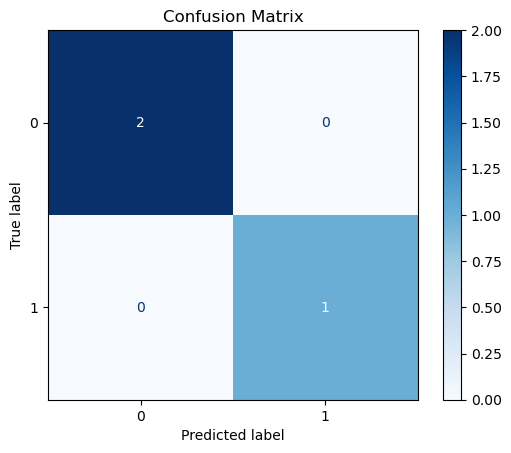

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Get predictions on the test set
y_pred = model.predict(X_test)

# 2. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])  # 0=Baseline, 1=Event
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()